In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from src import functions



## Import Data

In [2]:
data = pd.read_csv("customers.csv")

## Cleaning Dataset to keep only active loyal members

In [3]:

    data_sorted = data[data['Churn'] == 'Yes'].reset_index()
    data_sorted.drop(columns="customerID", inplace=True)  # usless data

## Description of the dataset.
### In order to be able to work with our dataset, we must know its contents, size, columns, columns type and so on...
    

In [4]:
functions.describe_dataset(data_sorted)

   index  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0      2    Male              0      No         No       2          Yes   
1      4  Female              0      No         No       2          Yes   
2      5  Female              0      No         No       8          Yes   
3      8  Female              0     Yes         No      28          Yes   
4     13    Male              0      No         No      49          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL            Yes  ...               No   
1            No     Fiber optic             No  ...               No   
2           Yes     Fiber optic             No  ...              Yes   
3           Yes     Fiber optic             No  ...              Yes   
4           Yes     Fiber optic             No  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No             

### We see that total charges is an object but it should be a float, so we check the min to spot empty value. 
### Then if every value is defined we can convert the column to float

In [5]:
    
    print("Total charges min: ", data_sorted["TotalCharges"].min())
    data_sorted["TotalCharges"] = data_sorted["TotalCharges"].astype("float64")
    print(data_sorted["SeniorCitizen"].head(10))  # Binary values => object
    data_sorted["SeniorCitizen"] = data_sorted["SeniorCitizen"].astype("object")


Total charges min:  100.25
0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: SeniorCitizen, dtype: int64



 ### Mean charges are more relevant than monthly charges.
 ### So we create a new column which is the mean of the TotalCharges column


In [6]:

    data_sorted["MeanMonthlyCharges"] = data_sorted["TotalCharges"]/data_sorted["tenure"]
    functions.describe_dataset(data_sorted)


   index  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0      2    Male             0      No         No       2          Yes   
1      4  Female             0      No         No       2          Yes   
2      5  Female             0      No         No       8          Yes   
3      8  Female             0     Yes         No      28          Yes   
4     13    Male             0      No         No      49          Yes   

  MultipleLines InternetService OnlineSecurity  ... TechSupport StreamingTV  \
0            No             DSL            Yes  ...          No          No   
1            No     Fiber optic             No  ...          No          No   
2           Yes     Fiber optic             No  ...          No         Yes   
3           Yes     Fiber optic             No  ...         Yes         Yes   
4           Yes     Fiber optic             No  ...          No         Yes   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \


### Plot every object vs Mean charges.
### The mean charges is very interesting because if is the main source of revenue for the firm.
### So we plot for every obeject column the mean and ???std or quantile + median??? of the tnure for every choice.


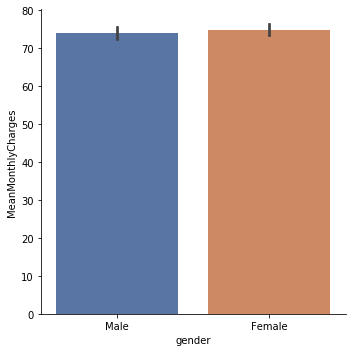

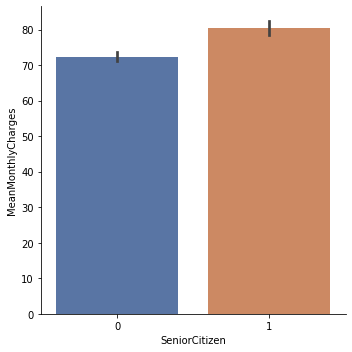

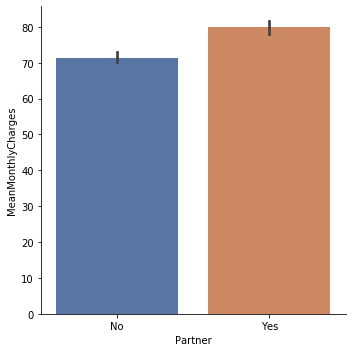

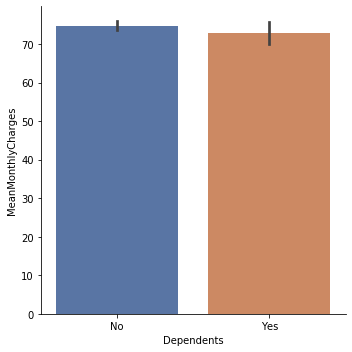

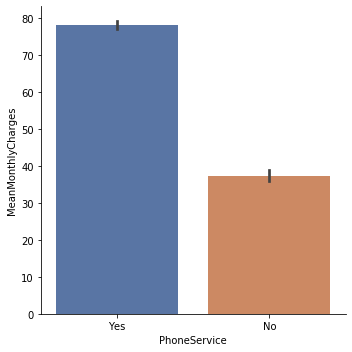

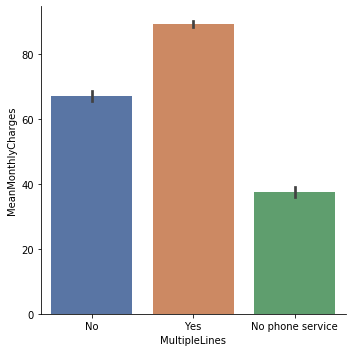

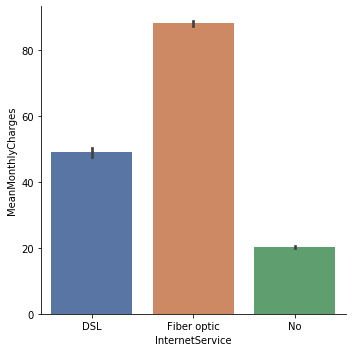

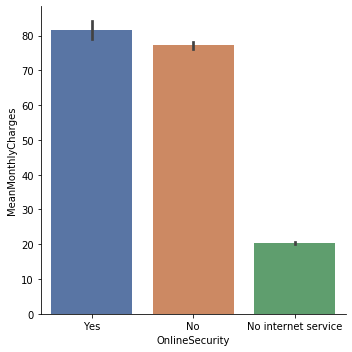

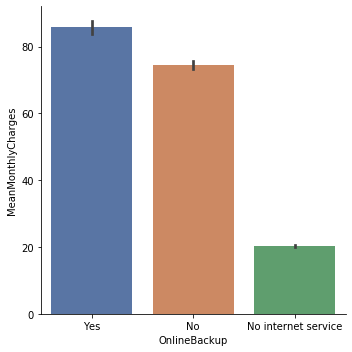

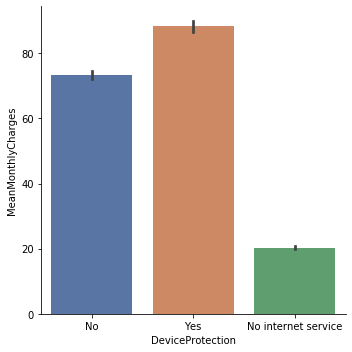

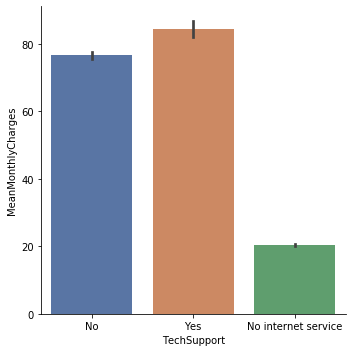

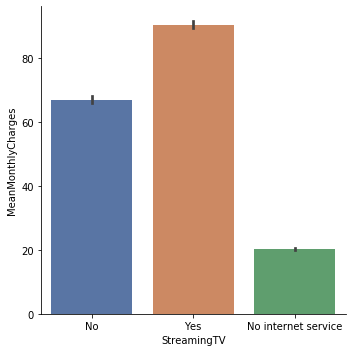

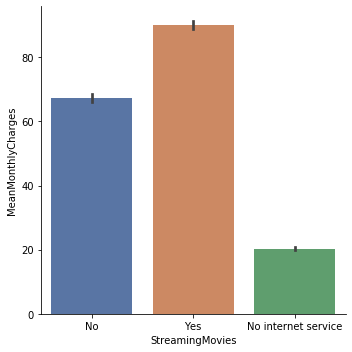

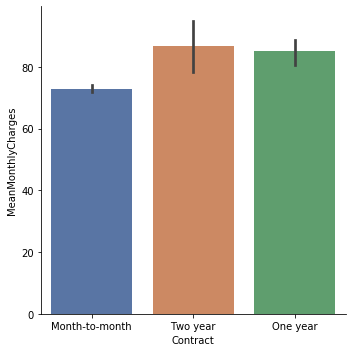

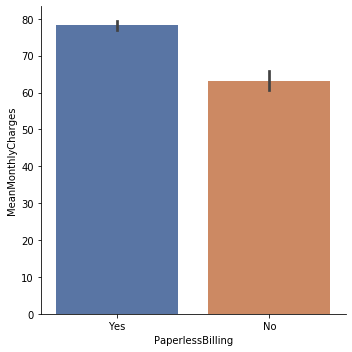

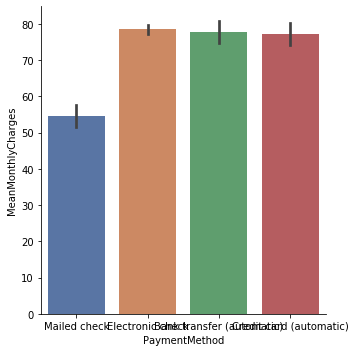

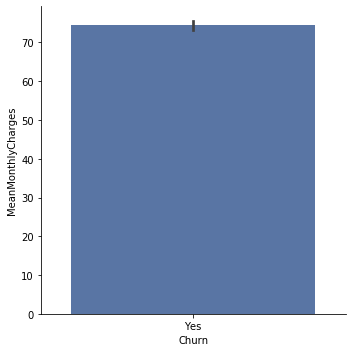

In [7]:

functions.plot_float_vs_objects(data_sorted, "MeanMonthlyCharges")


## Distribution analysis.
### Now we do the same as the previous part but for the distribution of continous float columns.
    

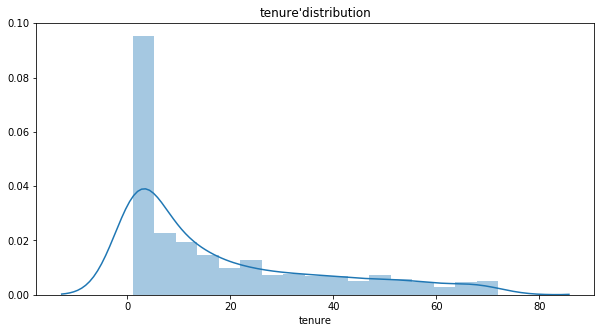

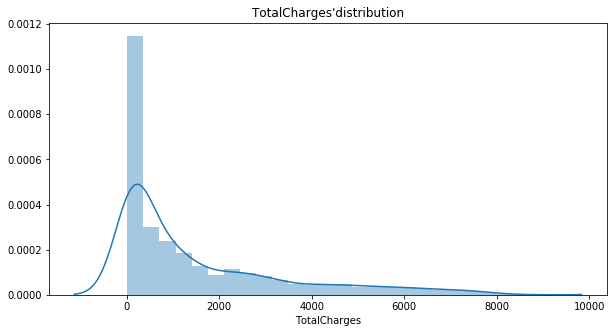

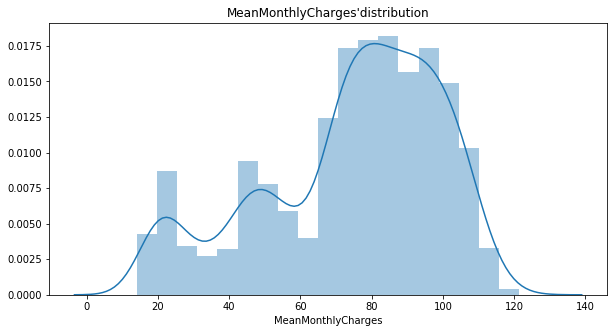

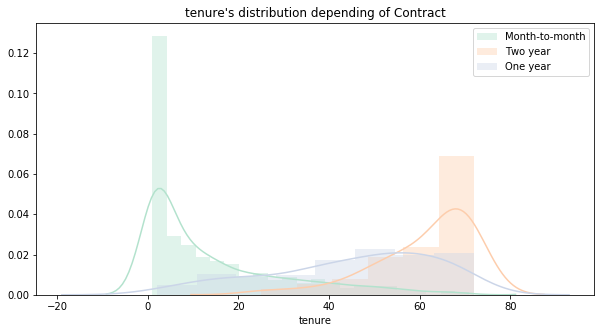

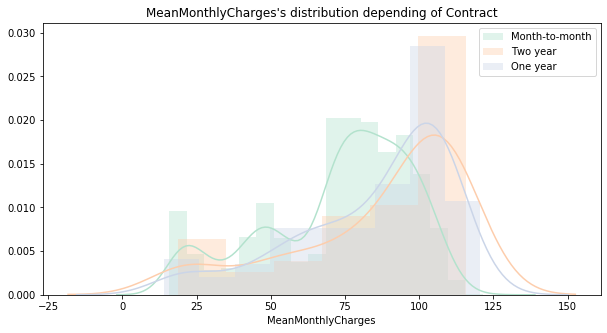

In [8]:
    functions.plot_distribution(data_sorted, "tenure")
    functions.plot_distribution(data_sorted, "TotalCharges")
    functions.plot_distribution(data_sorted, "MeanMonthlyCharges")

    functions.plot_distribution_by(data_sorted, "tenure", "Contract")
    functions.plot_distribution_by(data_sorted, "MeanMonthlyCharges", "Contract")




## Convert string to int.
### In order to be able to use this data in some algorithms we need to convert the object columns into float colums. To de so, we replace each differant choice with an interger.

In [9]:
   data_toint = functions.string_to_int(data_sorted)



## Correlation analysis.
### In order to identify the most important features, we performed a correlation analysis. We can decuce that the correlated options could be a good choice to create pack offers. And also that uncorrelated ones are good candidates for classification.
    

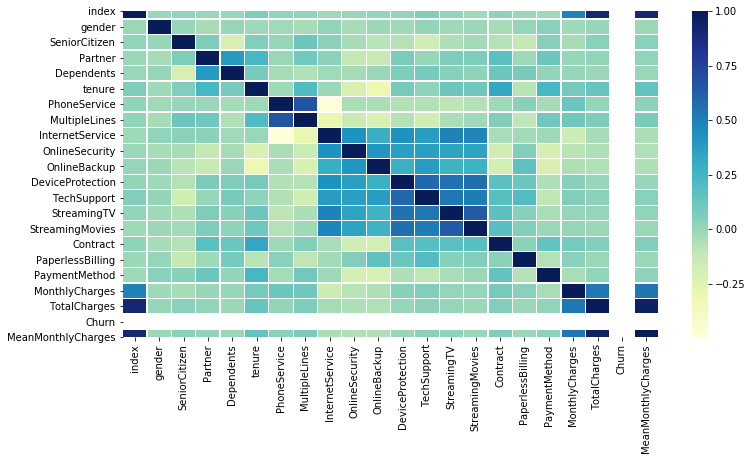

In [10]:
    functions.plot_correlation(data_toint)

In [13]:
# Cleaning Dataset to keep only active members
data_cleaned = data[data['Churn'] == 'Yes']

In [14]:

# data statistical description
numeric_data_description = data_cleaned.describe(include=['number'])
print(numeric_data_description)

object_data_description = data_cleaned.describe(include=['object'])
print(object_data_description)

       SeniorCitizen       tenure  MonthlyCharges
count    1869.000000  1869.000000     1869.000000
mean        0.254682    17.979133       74.441332
std         0.435799    19.531123       24.666053
min         0.000000     1.000000       18.850000
25%         0.000000     2.000000       56.150000
50%         0.000000    10.000000       79.650000
75%         1.000000    29.000000       94.200000
max         1.000000    72.000000      118.350000
        customerID  gender Partner Dependents PhoneService MultipleLines  \
count         1869    1869    1869       1869         1869          1869   
unique        1869       2       2          2            2             3   
top     8840-DQLGN  Female      No         No          Yes           Yes   
freq             1     939    1200       1543         1699           850   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             1869           1869         1869             1869   
unique               3     

In [1]:
print("HELLO")

HELLO


       SeniorCitizen       tenure  MonthlyCharges
count    1869.000000  1869.000000     1869.000000
mean        0.254682    17.979133       74.441332
std         0.435799    19.531123       24.666053
min         0.000000     1.000000       18.850000
25%         0.000000     2.000000       56.150000
50%         0.000000    10.000000       79.650000
75%         1.000000    29.000000       94.200000
max         1.000000    72.000000      118.350000
        customerID  gender Partner Dependents PhoneService MultipleLines  \
count         1869    1869    1869       1869         1869          1869   
unique        1869       2       2          2            2             3   
top     8840-DQLGN  Female      No         No          Yes           Yes   
freq             1     939    1200       1543         1699           850   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             1869           1869         1869             1869   
unique               3     

C:\Users\Yannick\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Yannick\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
No handles with labels found to put in legend.


gender      Female  Male
tenure                  
New            492   476
Loyal          342   311
Very Loyal     105   143


C:\Users\Yannick\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
No handles with labels found to put in legend.
C:\Users\Yannick\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


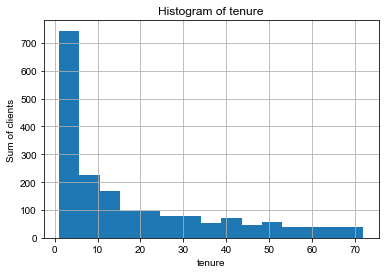

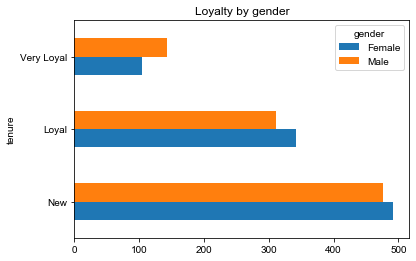

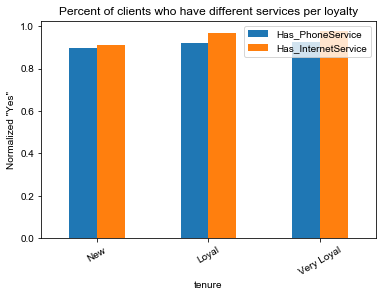

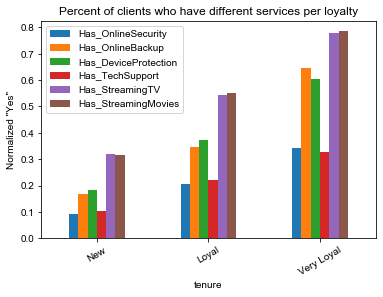

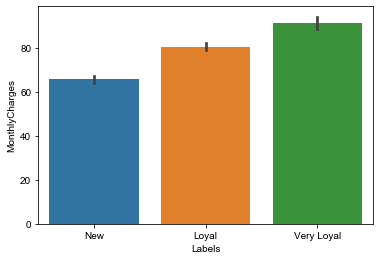

<Figure size 432x288 with 0 Axes>

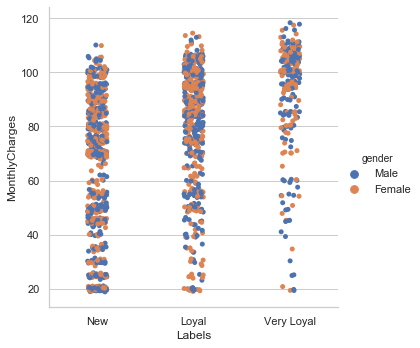

<Figure size 432x288 with 0 Axes>

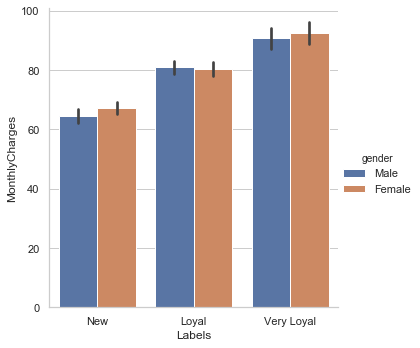

In [12]:



# See the distribution of the tenure
data_cleaned['tenure'].hist(bins=15)
plt.title("Histogram of tenure")
plt.xlabel('tenure')
plt.ylabel('Sum of clients')


# Binning the data per loyalty 
bins = np.array([0, 10, 45, data_cleaned['tenure'].max()])
group_names = ['New', 'Loyal', 'Very Loyal']
labels = pd.cut(data_cleaned['tenure'], bins, labels=group_names)

# Grouping the data by labels and gender
grouped = data_cleaned.groupby([labels, 'gender'])
Gender_loyalty = grouped.size().unstack()
Gender_loyalty.plot.barh(title='Loyalty by gender')
print(Gender_loyalty)

# From this plot one can observe the distribution of clients within the loyalty classification made above 

# Getting all the services into one plot 
# Normalize the services for their binary value 
# Setting bool to int
My_dict = {'Yes': 1, 'No': 0}
data_cleaned['PhoneService_int'] = data_cleaned['PhoneService'].replace("Yes", 1).replace("No", 0)

grouped2 = data_cleaned.groupby(labels)
PhoneService_norm = grouped2['PhoneService_int'].sum()/grouped2.size()
normed_infos = pd.DataFrame(PhoneService_norm, columns=['Has_PhoneService'])



# Getting the proportion on people with internet service

My_dict2={'DSL':1,'Fiber optic':1,'No':0}
data_cleaned['InternetService_int']=data_cleaned['InternetService'].map(My_dict2)

InternetService_norm = grouped2['InternetService_int'].sum()/grouped2.size()
normed_infos['Has_InternetService'] = InternetService_norm


props = {
    'title': 'Percent of clients who have different services per loyalty',
    'ylabel': 'Normalized "Yes"'
}


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set(**props)
ax.legend(loc='best')
normed_infos.plot.bar(ax=ax,rot=30)

# Analyze the internet services
data_cleaned_with_internet = data_cleaned[data_cleaned['InternetService']!= 'No']
labels2 = pd.cut(data_cleaned_with_internet['tenure'], bins, labels=group_names)
grouped3 = data_cleaned_with_internet.groupby(labels2)

internet_services_df = normed_infos.copy()

for x in data_cleaned.columns[9:15]:
    new_col = x + '_int'
    data_cleaned_with_internet[new_col]=data_cleaned_with_internet[x].map(My_dict)
    
    current_norm = grouped3[new_col].sum()/grouped3.size()
    internet_services_df['Has_'+x] = current_norm
    

internet_services_df.drop(columns=['Has_InternetService','Has_PhoneService'],inplace=True)

props2 = {
    'title': 'Percent of clients who have different internet services per loyalty',
    'ylabel': 'Normalized "Yes"'
}


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set(**props)
ax.legend(loc='best')
internet_services_df.plot.bar(ax=ax,rot=30)

# money spent per loyalty

data_cleaned['Labels']=labels
fig = plt.figure()
sns.barplot(x='Labels', y='MonthlyCharges',data=data_cleaned)
sns.set(style="whitegrid")

# Do women spend more money ?

fig = plt.figure()
sns.catplot(x='Labels', y='MonthlyCharges',hue='gender',data=data_cleaned)
sns.set(style="whitegrid")

# Other representation 

fig = plt.figure()
sns.catplot(x='Labels', y='MonthlyCharges', hue='gender',kind="bar",data=data_cleaned)
sns.set(style="whitegrid")

plt.show()
